In [ ]:
import pandas as pd
import numpy as np
import scipy as stats
import matplotlib.pyplot as plt

In [ ]:
datos=pd.read_csv("/content/empresa.csv")

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Cat       29 non-null     object        
 1   Nombre    29 non-null     object        
 2   Data_nac  28 non-null     datetime64[ns]
 3   Sexo      29 non-null     object        
 4   Ganancia  29 non-null     int64         
 5   Peso      28 non-null     float64       
 6   Estatura  28 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 1.7+ KB


In [ ]:
datos["Data_nac"]=pd.to_datetime(datos["Data_nac"],format="%d/%m/%Y")
datos

,Cat,Nombre,Data_nac,Sexo,Ganancia,Peso,Estatura
0,A,"Alonso Roma, Lucía",1999-12-02,M,3500,55.0,1.55
1,B,"López Antón, Claudio",1995-07-25,H,2600,70.0,1.78
2,B,"Barros Márquez, Antonio",1997-12-04,H,2100,95.0,1.86
3,D,"Loas Van, Yan",1989-05-20,M,1950,45.0,1.65
4,B,"Codeo Navarro, Noa",1996-10-22,M,2320,68.0,1.59
5,C,"Caro Martínez, Mario",1992-04-29,H,1080,76.0,1.90
6,A,"Alonso Alonso, Alba",2000-10-31,M,2870,58.0,1.65
7,D,"Díaz Barrientos, Alberto",1990-12-04,M,970,79.0,1.68
8,B,"Díaz Balón, Mara",1996-10-31,M,1030,67.0,1.70
9,C,"Roar Roar, Eugenio",1993-10-09,H,1570,58.0,1.87


In [ ]:
#Peso promedio
datos["Peso"].mean()

np.float64(69.32142857142857)

In [ ]:
#Mediana del peso
datos["Peso"].median()

68.5

In [ ]:
#Moda del peso
datos["Peso"].mode()

,Peso
0,58.0


In [ ]:
#Percentil 90
datos["Peso"].quantile(0.9)

np.float64(86.0)

In [ ]:
#La función agg() permite obtener varios estadísticos de la misma columna:
datos.agg({"Peso":["count","min","max","mean"]})

,Peso
count,28.000000
min,45.000000
max,95.000000
mean,69.321429


In [ ]:
datos.describe(include="all")

,Cat,Nombre,Data_nac,Sexo,Ganancia,Peso,Estatura
count,29,29,28,29,29.000000,28.000000,28.000000
unique,4,29,NaN,2,NaN,NaN,NaN
top,B,"Alonso Roma, Lucía",NaN,M,NaN,NaN,NaN
freq,9,1,NaN,18,NaN,NaN,NaN
mean,NaN,NaN,1994-11-14 20:34:17.142857088,NaN,1920.000000,69.321429,1.687143
min,NaN,NaN,1988-01-23 00:00:00,NaN,890.000000,45.000000,1.510000
25%,NaN,NaN,1991-07-17 00:00:00,NaN,1405.000000,59.500000,1.587500
50%,NaN,NaN,1994-12-21 12:00:00,NaN,1950.000000,68.500000,1.660000
75%,NaN,NaN,1997-06-19 00:00:00,NaN,2320.000000,76.750000,1.785000
max,NaN,NaN,2001-07-05 00:00:00,NaN,3500.000000,95.000000,1.900000


In [ ]:
#Si queremos datos relativos solo a algunas columnas:
datos[["Peso", "Estatura"]].describe()

,Peso,Estatura
count,28.000000,28.000000
mean,69.321429,1.687143
std,12.034068,0.115176
min,45.000000,1.510000
25%,59.500000,1.587500
50%,68.500000,1.660000
75%,76.750000,1.785000
max,95.000000,1.900000


In [ ]:
#imputación de datos con la media
datos['Peso']=datos['Peso'].fillna(datos['Peso'].mean())
datos['Peso']

,Peso
0,55.000000
1,70.000000
2,95.000000
3,45.000000
4,68.000000
5,76.000000
6,58.000000
7,79.000000
8,67.000000
9,58.000000


In [ ]:
#imputacion de datos con la media
datos['Estatura']=datos['Estatura'].fillna(datos['Estatura'].median())
datos['Estatura']

,Estatura
0,1.55
1,1.78
2,1.86
3,1.65
4,1.59
5,1.90
6,1.65
7,1.68
8,1.70
9,1.87


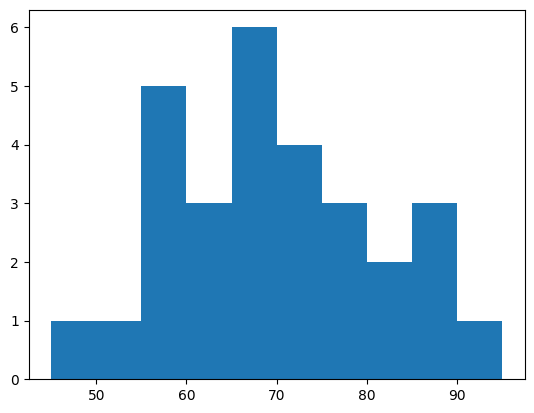

In [ ]:
plt.hist(datos["Peso"])
plt.show()

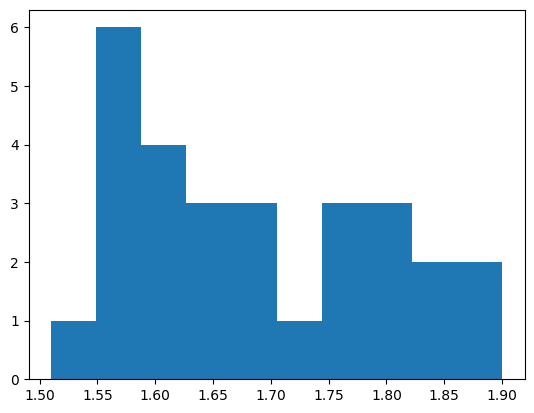

In [ ]:
plt.hist(datos["Estatura"])
plt.show()

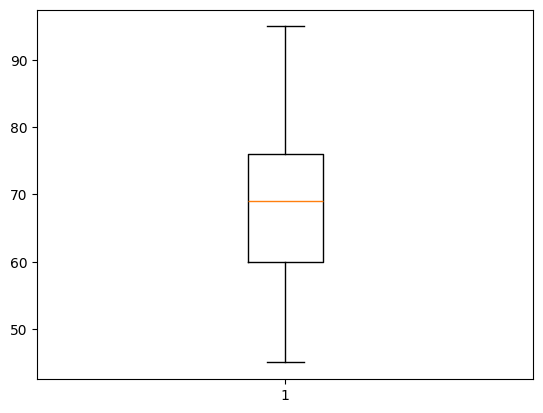

In [ ]:
plt.boxplot(datos['Peso'])
plt.show()

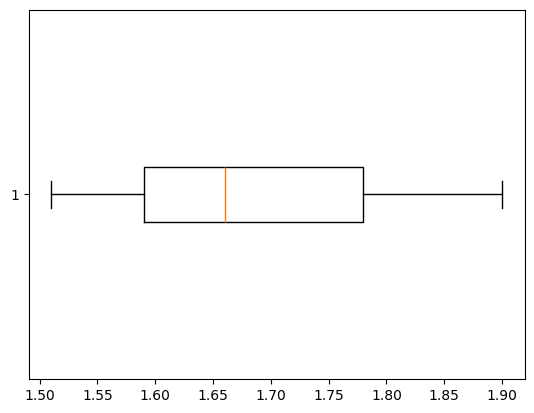

In [ ]:
plt.boxplot(datos['Estatura'],vert=False)
plt.show()

In [ ]:
#Calculamos los cuartiles y el rango intercuartílico
q1=datos['Peso'].quantile(0.25)
q2=datos['Peso'].quantile(0.5)
q3=datos['Peso'].quantile(0.75)

iqr=q3-q1

print(f"Q1={q1}, Q2={q2}, Q3={q3}")
print(f"El rango intercuartílico es {iqr}")



Q1=60.0, Q2=69.0, Q3=76.0
El rango intercuartílico es 16.0


In [ ]:
# Calcular la curtosis
from scipy.stats import kurtosis
curtosis_peso = kurtosis(datos['Peso'])
print(f"Curtosis del peso: {curtosis_peso}")

Curtosis del peso: -0.499196801099802


## **Agrupamiento**

In [ ]:
#Agrupar por Cat (también se puede agrupar por datos numéricos, fechas...):
datos_byCat=datos.groupby(by="Cat")
datos_byCat

In [ ]:
datos_byCat = datos.groupby("Cat")
datos_byCat

In [ ]:
#Con groups obtenemos un diccionario en donde las claves son los grupos y los valores las etiquetas de las filas o registros:
datos_byCat.groups

{'A': [0, 6, 10, 15, 16, 23, 26], 'B': [1, 2, 4, 8, 13, 17, 20, 24, 25], 'C': [5, 9, 11, 12, 21, 22, 27], 'D': [3, 7, 14, 18, 19, 28]}

In [ ]:
#pudiendo acceder a sus elementos:
datos_byCat.groups["B"]

Index([1, 2, 4, 8, 13, 17, 20, 24, 25], dtype='int64')

In [ ]:
datos_byCat.groups["B"][3]

np.int64(8)

In [ ]:
#para ver los datos de la fila o registro nº 10:
datos.loc[10]

,10
Cat,A
Nombre,"Fernández Soto, Sandra"
Data_nac,2000-04-08 00:00:00
Sexo,M
Ganancia,2040
Peso,57.0
Estatura,1.56


In [ ]:
#o ver cuantas agrupaciones distintas (nº de claves en el diccionario) hay según Cat:
len(datos_byCat.groups)

4

Ahora accedemos a las distintas tablas contenidas en el objeto resultado de la agrupación mediante funciones de agregación, algunas de las cuales son:



*   size(): nº de casos en cada grupo (cuenta los nulos)
*   count(): cuenta no nulos
*   sum(): suma de valores
*   mean(): media aritmética
*   min(): mínimo
*   max(): máximo
*   mode(): moda
*   std(): desviación estándar
*   var(): varianza
*   idxmax(): el índice de la 1ª ocurrencia del valor máximo en cada columna dentro de cada grupo
*   idxmin(): lo mismo pero con el valor mínimo
*   get_group("Grupo"): lista filas pertenecientes a ese grupo

Ejemplos:
La operación más sencilla es contar el número de filas o registros (se obtiene una serie):




In [ ]:
datos_byCat.size()

,0
Cat,
A,7
B,9
C,7
D,6


In [ ]:
#Si deseamos guardar en el archivo agrupados.csv la serie datos_byCat (después de aplicarle el método size en formato csv, y separados los campos por comas, por defecto):
#Obtenemos la serie para size:
serie=datos_byCat.size()

In [ ]:
# Convertimos la serie en un dataframe:
df=serie.to_frame()
df

,0
Cat,
A,7
B,9
C,7
D,6


In [ ]:
# Guardamos el dataframe:
df.to_csv("grupos.csv")

In [ ]:
#Se puede hacer un filtrado previo, después agrupar y finalmente aplicar una función en una sola línea (también se podría hacer por pasos):
((datos[datos["Ganancia"]>2000]).groupby("Cat")).size()

,0
Cat,
A,6
B,7


In [ ]:
# Con count():

datos_byCat.count()

,Nombre,Data_nac,Sexo,Ganancia,Peso,Estatura
Cat,,,,,,
A,7,7,7,7,7,7
B,9,9,9,9,9,9
C,7,6,7,7,7,7
D,6,6,6,6,6,6


In [ ]:
datos_byCat.Sexo.count()

,Sexo
Cat,
A,7
B,9
C,7
D,6


In [ ]:
datos_byCat.Ganancia.sum()

,Ganancia
Cat,
A,17960
B,19075
C,11330
D,7315


In [ ]:
# Si deseamos convertir la serie en DataFrame (para seguir manipulándola, guardarla como tabla csv…)
# haremos (la suma de Ganancia para cada Cat se traslada a una nueva columna llamada Total_Ganancia):
ranking=datos_byCat.Ganancia.sum().to_frame("Ganancias totales por categoria")
ranking

,Ganancias totales por categoria
Cat,
A,17960
B,19075
C,11330
D,7315


In [ ]:
datos_byCat[["Ganancia", "Peso"]].max()


,Ganancia,Peso
Cat,,
A,3500,86.0
B,2700,95.0
C,1930,88.0
D,1950,83.0


In [ ]:
#Informacion completa del registro que contiene la mayor ganancia de la categoria B
datos_byCat.max().loc["B"]

,B
Nombre,"Sánchez Vázquez, Carla"
Data_nac,1997-12-04 00:00:00
Sexo,M
Ganancia,2700
Peso,95.0
Estatura,1.86


In [ ]:
def sort_group(group, columna="Estatura"):
  return group.sort_values(by=columna, ascending=False)

datos_byCat.apply(sort_group)

<ipython-input-81-e7dcf57aa04a>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  datos_byCat.apply(sort_group)


Cat                     Nombre   Data_nac Sexo  Ganancia       Peso  \
Cat                                                                          
A   15   A     Viña Rodríguez, Matías 1988-01-23    H      1030  86.000000   
    23   A    Rodríguez Sánchez, Alba 1998-12-15    M      2900  61.000000   
    16   A      Pose Andrade, Gerardo 2001-07-05    H      3040  66.000000   
    6    A        Alonso Alonso, Alba 2000-10-31    M      2870  58.000000   
    26   A     Vázquez Sánchez, María 2001-06-17    M      2580  86.000000   
    10   A     Fernández Soto, Sandra 2000-04-08    M      2040  57.000000   
    0    A         Alonso Roma, Lucía 1999-12-02    M      3500  55.000000   
B   2    B    Barros Márquez, Antonio 1997-12-04    H      2100  95.000000   
    13   B      Román González, Jorge 1995-04-15    H      2040  54.000000   
    1    B       López Antón, Claudio 1995-07-25    H      2600  70.000000   
    8    B           Díaz Balón, Mara 1996-10-31    M      1030  67.000000   
    17   B     Sánchez Vázquez, Carla 1997-04-24    M      2700  71.000000   
    4    B         Codeo Navarro, Noa 1996-10-22    M      2320  68.000000   
    20   B      Rodríguez Soto, María 1994-12-12    M      2005  65.000000   
    25   B        Román González, Noa 1994-12-31    M      1980  74.000000   
    24   B  Rodríguez Porta, Estrella 1996-05-07    M      2300  60.000000   
C   5    C       Caro Martínez, Mario 1992-04-29    H      1080  76.000000   
    9    C         Roar Roar, Eugenio 1993-10-09    H      1570  58.000000   
    27   C       Rey Barreiro, Martín 1991-01-27    H      1900  88.000000   
    22   C  Rodríguez Sánchez, Paloma        NaT    M      1550  69.000000   
    21   C   Rodríguez Porta, Manuela 1994-12-12    M      1600  64.000000   
    12   C      García González, Lola 1993-02-03    M      1930  76.000000   
    11   C      Martínez Palón, María 1992-09-09    M      1700  82.000000   
D   14   D    Sandoval Sendín, Marcos 1990-05-28    H       890  58.000000   
    28   D       López Navarro, Pedro 1989-03-14    H      1405  83.000000   
    19   D            Rey Roar, Jorge 1991-09-12    H      1010  70.000000   
    7    D   Díaz Barrientos, Alberto 1990-12-04    M       970  79.000000   
    18   D           Amigo Rey, Marta 1989-11-20    M      1090  69.321429   
    3    D              Loas Van, Yan 1989-05-20    M      1950  45.000000   

        Estatura  
Cat               
A   15      1.78  
    23      1.73  
    16      1.67  
    6       1.65  
    26      1.58  
    10      1.56  
    0       1.55  
B   2       1.86  
    13      1.82  
    1       1.78  
    8       1.70  
    17      1.65  
    4       1.59  
    20      1.59  
    25      1.58  
    24      1.55  
C   5       1.90  
    9       1.87  
    27      1.80  
    22      1.60  
    21      1.60  
    12      1.58  
    11      1.51  
D   14      1.83  
    28      1.80  
    19      1.78  
    7       1.68  
    18      1.66  
    3       1.65

In [ ]:
datos_byCat.get_group("B")

,Cat,Nombre,Data_nac,Sexo,Ganancia,Peso,Estatura
1,B,"López Antón, Claudio",1995-07-25,H,2600,70.0,1.78
2,B,"Barros Márquez, Antonio",1997-12-04,H,2100,95.0,1.86
4,B,"Codeo Navarro, Noa",1996-10-22,M,2320,68.0,1.59
8,B,"Díaz Balón, Mara",1996-10-31,M,1030,67.0,1.70
13,B,"Román González, Jorge",1995-04-15,H,2040,54.0,1.82
17,B,"Sánchez Vázquez, Carla",1997-04-24,M,2700,71.0,1.65
20,B,"Rodríguez Soto, María",1994-12-12,M,2005,65.0,1.59
24,B,"Rodríguez Porta, Estrella",1996-05-07,M,2300,60.0,1.55
25,B,"Román González, Noa",1994-12-31,M,1980,74.0,1.58


In [ ]:
datos_byCat.agg({"Ganancia":["count","min","max","mean"]})

Ganancia                         
       count   min   max         mean
Cat                                  
A          7  1030  3500  2565.714286
B          9  1030  2700  2119.444444
C          7  1080  1930  1618.571429
D          6   890  1950  1219.166667

In [ ]:
datos_byCat2=datos.groupby(["Cat"], as_index=False).agg({"Ganancia":"sum"})
datos_byCat2

,Cat,Ganancia
0,A,17960
1,B,19075
2,C,11330
3,D,7315


In [ ]:
datos_byCat3=datos.groupby(["Cat"], as_index=False).agg({"Ganancia":"sum", "Peso":"mean"})
datos_byCat3

,Cat,Ganancia,Peso
0,A,17960,67.000000
1,B,19075,69.333333
2,C,11330,73.285714
3,D,7315,67.386905


In [ ]:
datos_byCat4=datos.groupby(["Cat"], as_index=False).agg(Ganancia_suma=("Ganancia", "sum"), Ganancia_media=("Ganancia","mean"))
datos_byCat4

,Cat,Ganancia_suma,Ganancia_media
0,A,17960,2565.714286
1,B,19075,2119.444444
2,C,11330,1618.571429
3,D,7315,1219.166667
